In [2]:
#importing require python packages
import numpy as np 
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split 
from genetic_selection import GeneticSelectionCV
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sns

In [3]:
#laoding & displaying dataset values
dataset = pd.read_csv("dataset/CAN.csv")
dataset

,Label,Time,ID,Signal1_of_ID,Signal2_of_ID,Signal3_of_ID,Signal4_of_ID
0,0,8.100845e+07,id3,0.200000,1.000000,NaN,NaN
1,0,8.100846e+07,id9,0.370003,NaN,NaN,NaN
2,0,8.100846e+07,id7,0.044139,0.000000,NaN,NaN
3,0,8.100846e+07,id8,0.170534,NaN,NaN,NaN
4,0,8.100846e+07,id5,0.173044,0.874886,NaN,NaN
...,...,...,...,...,...,...,...
2575798,0,8.550892e+07,id10,0.336289,0.555556,0.913794,0.352531
2575799,0,8.550892e+07,id8,0.215258,NaN,NaN,NaN
2575800,0,8.550892e+07,id4,0.233920,NaN,NaN,NaN
2575801,0,8.550892e+07,id3,0.800000,1.000000,NaN,NaN


In [12]:
#Dataset Exploration 
#describing dataset for each column in terms of count, mean, standard deviation etc and by uisng this we can know the
#importance of each columns
dataset.describe()

,Label,Time,Signal1_of_ID,Signal2_of_ID,Signal3_of_ID,Signal4_of_ID
count,2.575803e+06,2.575803e+06,2.575803e+06,1.918455e+06,275736.000000,112921.000000
mean,3.025169e-01,8.325403e+07,3.393861e-01,6.495193e-01,0.386199,0.387427
std,4.593479e-01,1.299185e+06,2.932694e-01,3.339861e-01,0.302042,0.066162
min,0.000000e+00,8.100845e+07,0.000000e+00,0.000000e+00,0.000000,0.222089
25%,0.000000e+00,8.212913e+07,1.172740e-01,4.025682e-01,0.194169,0.346848
50%,0.000000e+00,8.324363e+07,2.529841e-01,7.500000e-01,0.240539,0.384280
75%,1.000000e+00,8.438190e+07,5.789474e-01,9.993689e-01,0.555807,0.423877
max,1.000000e+00,8.550892e+07,1.000000e+00,1.000000e+00,1.000000,0.747278


In [13]:
#this block used to find count of different signal1 on different ID
#by using this exploration we can see different signal1 on different ID
signal_count = pd.DataFrame(dataset.groupby(['ID','Signal1_of_ID']).size().nlargest(10).reset_index())
signal_count.rename(columns = {0: 'Signal Count'}, inplace = True)
signal_count

,ID,Signal1_of_ID,Signal Count
0,id2,0.000000,102298
1,id3,1.000000,81425
2,id3,0.000000,72128
3,id3,0.400000,65186
4,id3,0.200000,59812
5,id3,0.800000,56067
6,id3,0.600000,55306
7,id6,1.000000,55015
8,id4,0.000000,39439
9,id6,0.394737,29699


In [14]:
#this block used to find count of different signal2 on different ID
#by using this exploration we can see different signal2 on different ID
signal_count = pd.DataFrame(dataset.groupby(['ID','Signal2_of_ID']).size().nlargest(10).reset_index())
signal_count.rename(columns = {0: 'Signal Count'}, inplace = True)
signal_count

,ID,Signal2_of_ID,Signal Count
0,id3,1.000000,257833
1,id5,0.999369,92623
2,id7,0.000000,81594
3,id1,0.750000,71277
4,id1,0.500000,69813
5,id7,0.250000,67980
6,id7,0.750000,67846
7,id1,0.250000,67562
8,id1,1.000000,67240
9,id1,0.000000,66935


In [15]:
#this block used to find count of different signal3 on different ID and labels
#by using this exploration we can see different signal2 on different ID
#in this method we are showing signal with label attack and no attack where 0 means no-attack and 1 means attack 
signal_count = pd.DataFrame(dataset.groupby(['ID','Signal3_of_ID', 'Label']).size().nlargest(10).reset_index())
signal_count.rename(columns = {0: 'Signal Count'}, inplace = True)
signal_count

,ID,Signal3_of_ID,Label,Signal Count
0,id10,0.999196,0,22319
1,id10,0.321154,0,8097
2,id10,0.321154,1,8014
3,id2,0.000000,0,5339
4,id2,0.194169,1,5072
5,id10,0.633498,1,4753
6,id2,0.214818,1,4686
7,id10,0.999196,1,4362
8,id2,0.208604,0,3435
9,id10,0.330841,0,3310


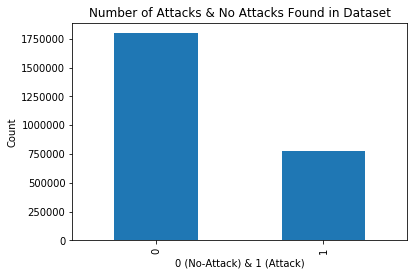

In [9]:
#DATASET VISUALIZATIONS
#finding & ploting graph of attacs from the dataset
labels = np.unique(dataset['Label'])
label = dataset.groupby('Label').size()
label.plot(kind="bar")
plt.xlabel("0 (No-Attack) & 1 (Attack)")
plt.ylabel("Count")
plt.title("Number of Attacks & No Attacks Found in Dataset")
plt.show()

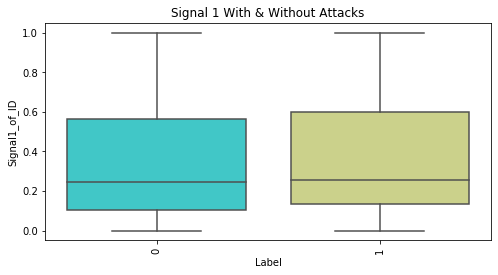

In [11]:
#in below graph we are finding & plotting signal 1 graph with and with out attacks
plt.xticks(rotation=90)
sns.boxplot(x='Label',y='Signal1_of_ID',data=dataset,palette='rainbow')
plt.rcParams["figure.figsize"]= [8,4]
plt.title("Signal 1 With & Without Attacks")
plt.show()

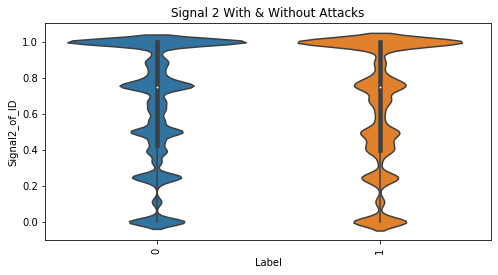

In [12]:
#in below graph we are finding & plotting signal 2 graph with and with out attacks
plt.xticks(rotation=90)
sns.violinplot(x='Label',y='Signal2_of_ID',data=dataset)
plt.title("Signal 2 With & Without Attacks")
plt.show()

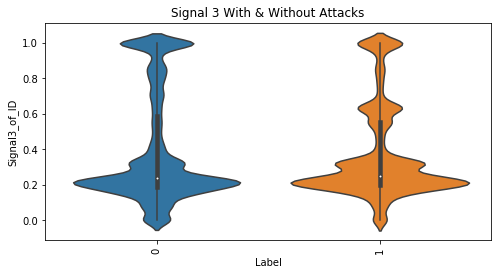

In [13]:
#in below graph we are finding & plotting signal 3 graph with and with out attacks
plt.xticks(rotation=90)
sns.violinplot(x='Label',y='Signal3_of_ID',data=dataset)
plt.title("Signal 3 With & Without Attacks")
plt.show()

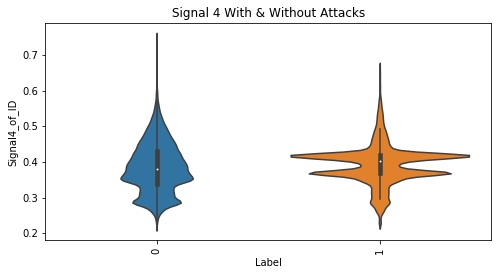

In [14]:
#in below graph we are finding & plotting signal 4 graph with and with out attacks
plt.xticks(rotation=90)
sns.violinplot(x='Label',y='Signal4_of_ID',data=dataset)
plt.title("Signal 4 With & Without Attacks")
plt.show()

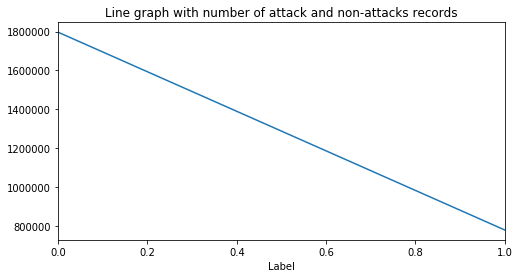

In [16]:
#line plot graph with number of attacks and non attacks
dataset.groupby(['Label']).size().plot(kind='line')
plt.title("Line graph with number of attack and non-attacks records")
plt.show()

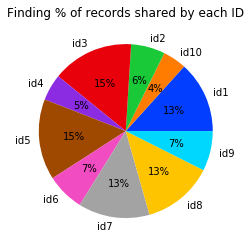

In [17]:
#Finding and plotting graph for % of records shared by each ID
palette_color = sns.color_palette('bright')
names, count = np.unique(dataset['ID'], return_counts=True)
plt.pie(count[0:20], labels=names[0:20], colors=palette_color, autopct='%.0f%%')
plt.title("Finding % of records shared by each ID")
plt.xticks(rotation=90)
plt.show()

In [18]:
#Dataset Preprocessing
#now we are dealing with missing data by finding count of missing values with each column
dataset.isnull().sum()

Label                  0
Time                   0
ID                     0
Signal1_of_ID          0
Signal2_of_ID     657348
Signal3_of_ID    2300067
Signal4_of_ID    2462882
dtype: int64

In [19]:
#this dataset contains both numeric and non-numeric data but ML algorithms accept only Numeric data so by applying
#label encoder class we are converting non-numeric data into numerci values
label_encoder = []
columns = dataset.columns
types = dataset.dtypes.values
for i in range(len(types)):
    name = types[i]
    if name == 'object': #finding column with object type
        le = LabelEncoder()
        dataset[columns[i]] = pd.Series(le.fit_transform(dataset[columns[i]].astype(str)))#encode all str columns to numeric 
        label_encoder.append(le)
dataset
#in below table we can see all values are converted to numeric format

,Label,Time,ID,Signal1_of_ID,Signal2_of_ID,Signal3_of_ID,Signal4_of_ID
0,0,8.100845e+07,3,0.200000,1.000000,NaN,NaN
1,0,8.100846e+07,9,0.370003,NaN,NaN,NaN
2,0,8.100846e+07,7,0.044139,0.000000,NaN,NaN
3,0,8.100846e+07,8,0.170534,NaN,NaN,NaN
4,0,8.100846e+07,5,0.173044,0.874886,NaN,NaN
...,...,...,...,...,...,...,...
2575798,0,8.550892e+07,1,0.336289,0.555556,0.913794,0.352531
2575799,0,8.550892e+07,8,0.215258,NaN,NaN,NaN
2575800,0,8.550892e+07,4,0.233920,NaN,NaN,NaN
2575801,0,8.550892e+07,3,0.800000,1.000000,NaN,NaN


In [20]:
#now repalcing missing values with mean
dataset = dataset.apply(lambda x: x.fillna(x.mean())) 
dataset.fillna(0, inplace = True)
#again finding missing values
dataset.isnull().sum()

Label            0
Time             0
ID               0
Signal1_of_ID    0
Signal2_of_ID    0
Signal3_of_ID    0
Signal4_of_ID    0
dtype: int64

In [21]:
#now displaying dataset after replacing missing values with mean
dataset

,Label,Time,ID,Signal1_of_ID,Signal2_of_ID,Signal3_of_ID,Signal4_of_ID
0,0,8.100845e+07,3,0.200000,1.000000,0.386199,0.387427
1,0,8.100846e+07,9,0.370003,0.649519,0.386199,0.387427
2,0,8.100846e+07,7,0.044139,0.000000,0.386199,0.387427
3,0,8.100846e+07,8,0.170534,0.649519,0.386199,0.387427
4,0,8.100846e+07,5,0.173044,0.874886,0.386199,0.387427
...,...,...,...,...,...,...,...
2575798,0,8.550892e+07,1,0.336289,0.555556,0.913794,0.352531
2575799,0,8.550892e+07,8,0.215258,0.649519,0.386199,0.387427
2575800,0,8.550892e+07,4,0.233920,0.649519,0.386199,0.387427
2575801,0,8.550892e+07,3,0.800000,1.000000,0.386199,0.387427


In [23]:
#now splitting dataset into train & test where application using 80% dataset for training and 20% for testing
train = dataset.values
train = train[0:14000]
X = train[:, 3:7] #extracting X features
Y = train[:, 0] #extracting target Y Features
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)
print("Total records available in dataset : "+str(X.shape[0]))
print("80% training records : "+str(X_train.shape[0]))
print("20% testing records  : "+str(X_test.shape[0]))

Total records available in dataset : 14000
80% training records : 11200
20% testing records  : 2800


In [24]:
#now training KNN Algorithm
estimator = KNeighborsClassifier()
estimator.fit(X_train, y_train)
y_pred = estimator.predict(X_test)
knn_hr = accuracy_score(y_test,y_pred)*100
knn_cr = precision_score(y_test, y_pred,average='macro') * 100
tn, knn_mr, knn_fr, tp = confusion_matrix(y_test, y_pred).ravel()
if knn_mr > 100:
    knn_mr = knn_mr/10
if knn_fr > 100:
    knn_fr = knn_fr/10
knn_mr = knn_mr/100
knn_fr = knn_fr/100
print("KNN Classifier Performance Details : \n");
print("KNN Hit Rate               : "+str(knn_hr))
print("KNN Miss Rate              : "+str(knn_mr))
print("KNN False Alarm Rate       : "+str(knn_fr))
print("KNN Correct Rejection Rate : "+str(knn_cr))

KNN Classifier Performance Details : 

KNN Hit Rate               : 91.64285714285715
KNN Miss Rate              : 0.74
KNN False Alarm Rate       : 0.16
KNN Correct Rejection Rate : 89.80093298674059


In [26]:
#now training Decision Tree Algorithm
estimator = DecisionTreeClassifier(max_features=2)
estimator.fit(X_train, y_train)
y_pred = estimator.predict(X_test)
decision_hr = accuracy_score(y_test,y_pred)*100
decision_cr = precision_score(y_test, y_pred,average='macro') * 100
tn, decision_mr, decision_fr, tp = confusion_matrix(y_test, y_pred).ravel()
if decision_mr > 100:
    decision_mr = decision_mr/10
if decision_fr > 100:
    decision_fr = decision_fr/10
decision_mr = decision_mr/100
decision_fr = decision_fr/100
print("Decision Tree Classifier Performance Details : \n");
print("Decision Tree Hit Rate               : "+str(decision_hr))
print("Decision Tree Miss Rate              : "+str(decision_mr))
print("Decision Tree False Alarm Rate       : "+str(decision_fr))
print("Decision Tree Correct Rejection Rate : "+str(decision_cr))

Decision Tree Classifier Performance Details : 

Decision Tree Hit Rate               : 90.39285714285714
Decision Tree Miss Rate              : 0.106
Decision Tree False Alarm Rate       : 0.163
Decision Tree Correct Rejection Rate : 87.28825563054308


In [27]:
estimator = svm.SVC(C=2.0,gamma='scale',kernel = 'rbf', random_state = 0)
estimator.fit(X_train, y_train)
y_pred = estimator.predict(X_test)
svm_hr = accuracy_score(y_test,y_pred)*100
svm_cr = precision_score(y_test, y_pred,average='macro') * 100
tn, svm_mr, svm_fr, tp = confusion_matrix(y_test, y_pred).ravel()
if svm_mr > 100:
    svm_mr = svm_mr/10
if svm_fr > 100:
    svm_fr = svm_fr/10
svm_mr = svm_mr/100
svm_fr = svm_fr/100
print("Conventional SVM Classifier Performance Details : \n");
print("Conventional SVM Hit Rate               : "+str(svm_hr))
print("Conventional SVM Miss Rate              : "+str(svm_mr))
print("Conventional SVM False Alarm Rate       : "+str(svm_fr))
print("Conventional SVM Correct Rejection Rate : "+str(svm_cr))

Conventional SVM Classifier Performance Details : 

Conventional SVM Hit Rate               : 86.03571428571428
Conventional SVM Miss Rate              : 0.179
Conventional SVM False Alarm Rate       : 0.212
Conventional SVM Correct Rejection Rate : 80.50948837327539


In [29]:
estimator = svm.SVC(C=2.0,gamma='scale',kernel = 'rbf', random_state = 0,class_weight='balanced')
selector = GeneticSelectionCV(estimator, cv=5, verbose=1, scoring="accuracy", max_features=3, n_population=5,
                              crossover_proba=0.5, mutation_proba=0.2, n_generations=5, crossover_independent_proba=0.5,
                              mutation_independent_proba=0.05, tournament_size=3, n_gen_no_change=2, caching=True, n_jobs=-1)
selector = selector.fit(X_train, y_train)
y_pred = selector.predict(X_test)
sso_hr = accuracy_score(y_pred,y_pred)*100
sso_cr = precision_score(y_pred, y_pred,average='macro') * 100
classifier = selector
tn, sso_mr, sso_fr, tp = confusion_matrix(y_test, y_pred).ravel()
if sso_mr > 100:
    sso_mr = sso_mr/10
if sso_fr > 100:
    sso_fr = sso_fr/10
sso_mr = sso_mr/100
sso_fr = sso_fr/100
print("Propose SSO Classifier Performance Details : \n");
print("Propose SSO Hit Rate               : "+str(sso_hr))
print("Propose SSO Miss Rate              : "+str(sso_mr))
print("Propose SSO False Alarm Rate       : "+str(sso_fr))
print("Propose SSO Correct Rejection Rate : "+str(sso_cr))

Selecting features with genetic algorithm.
gen	nevals	avg                    	std                    	min                    	max                    
0  	5     	[0.53292857 2.        ]	[0.19313854 0.63245553]	[0.30169643 1.        ]	[0.76517857 3.        ]
1  	2     	[0.70407143 2.6       ]	[0.05401839 0.48989795]	[0.64160714 2.        ]	[0.76517857 3.        ]
2  	4     	[0.75358929 2.6       ]	[0.02317857 0.8       ]	[0.70723214 1.        ]	[0.76517857 3.        ]
Propose SSO Classifier Performance Details : 

Propose SSO Hit Rate               : 100.0
Propose SSO Miss Rate              : 0.517
Propose SSO False Alarm Rate       : 0.163
Propose SSO Correct Rejection Rate : 100.0


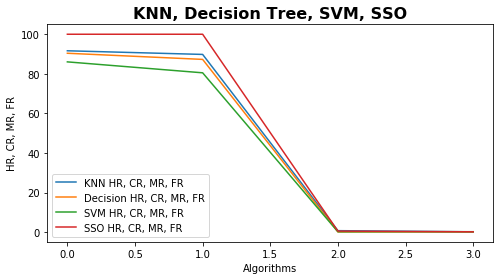

In [31]:
#plot all algorithms Performance graph
def graph():
    knn = [knn_hr,knn_cr,knn_mr,knn_fr]
    decision = [decision_hr,decision_cr,decision_mr,decision_fr]
    svm = [svm_hr,svm_cr,svm_mr,svm_fr]
    sso = [sso_hr,sso_cr,sso_mr,sso_fr]
    plt.plot(knn, label="KNN HR, CR, MR, FR")
    plt.plot(decision, label="Decision HR, CR, MR, FR")
    plt.plot(svm, label="SVM HR, CR, MR, FR")
    plt.plot(sso, label="SSO HR, CR, MR, FR")
    plt.legend(loc='lower left')
    plt.title("KNN, Decision Tree, SVM, SSO", fontsize=16, fontweight='bold')
    plt.xlabel("Algorithms")
    plt.ylabel("HR, CR, MR, FR")
    plt.show()
graph()    

In [34]:
def predict():
    filename = "dataset/test.txt"
    test = pd.read_csv(filename)
    test = test.values[:, 2:7]
    total = len(test)
    y_pred = classifier.predict(test)
    for i in range(len(test)):
        if str(y_pred[i]) == '0.0':
            print("X=%s, Predicted = %s" % (test[i], 'No Anomaly Detected')+"\n\n")
        if str(y_pred[i]) == '1.0':
            print("X=%s, Predicted = %s" % (test[i], 'Anomaly Detected')+"\n\n")
predict()            

X=[0.3737464000855015 0.6666666666666666 0.9991955021452382
 0.4751998828306158], Predicted = No Anomaly Detected


X=[0.3724087697056715 0.4444444444444444 0.9991955021452382
 0.4742021322882787], Predicted = No Anomaly Detected


X=[0.2606403975001365 0.3333333333333333 0.991360094035214
 0.2657348462977239], Predicted = No Anomaly Detected


X=[0.0 0.0 0.0 0.0], Predicted = Anomaly Detected


X=[0.2329494081254529 0.42279967135772256 0.0 0.0], Predicted = No Anomaly Detected


X=[0.2329494081254529 0.42279967135772256 0.0 0.0], Predicted = No Anomaly Detected


X=[0.061546506189195986 0.75 0.0 0.0], Predicted = Anomaly Detected


X=[1.0 1.0 0.0 0.0], Predicted = No Anomaly Detected


